In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv("processed_data.csv")

In [3]:
data

,X,flag,alon_week,alon_wend,child_bull,comp_house,comp_noint_bed_16,comp_int_bed_16,comp_week,comp_wend,...,talk_phon_wend,text_week,text_wend,tran_week,tran_wend,tv_week,tv_wend,weight_16,work_week,work_wend
0,1,synthetic,1-2 hours,1-2 hours,No,Yes,NaN,NaN,1-2 hours,1-2 hours,...,Any at all,Less than 1 hour,Less than 1 hour,Less than 1 hour,Less than 1 hour,1-2 hours,1-2 hours,59.294132,3 or more hours,3 or more hours
1,2,synthetic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,synthetic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,synthetic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.812426,NaN,NaN
4,5,synthetic,1-2 hours,3 or more hours,No,NaN,Yes,NaN,1-2 hours,Less than 1 hour,...,Not at all,Not at all,Not at all,Less than 1 hour,Less than 1 hour,1-2 hours,3 or more hours,62.270030,1-2 hours,1-2 hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13729,13730,synthetic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13730,13731,synthetic,1-2 hours,3 or more hours,No,NaN,NaN,NaN,1-2 hours,1-2 hours,...,Not at all,Less than 1 hour,Less than 1 hour,Less than 1 hour,Less than 1 hour,3 or more hours,3 or more hours,NaN,1-2 hours,1-2 hours
13731,13732,synthetic,1-2 hours,1-2 hours,No,NaN,NaN,NaN,1-2 hours,1-2 hours,...,Any at all,1-2 hours,1-2 hours,1 or more hours,1 or more hours,3 or more hours,3 or more hours,58.075832,Less than 1 hour,Less than 1 hour
13732,13733,synthetic,Less than 1 hour,1-2 hours,No,Yes,NaN,NaN,Less than 1 hour,1-2 hours,...,Any at all,1-2 hours,1-2 hours,Less than 1 hour,Less than 1 hour,Not at all,Less than 1 hour,NaN,Less than 1 hour,1-2 hours


In [4]:
targets_dep_score = data[['dep_score']]

r2_list = []





# Category A

### Regression: comp_week - dep_score

RMSE value:  0.9422264200974844
R2 value:  -0.004149344358364004


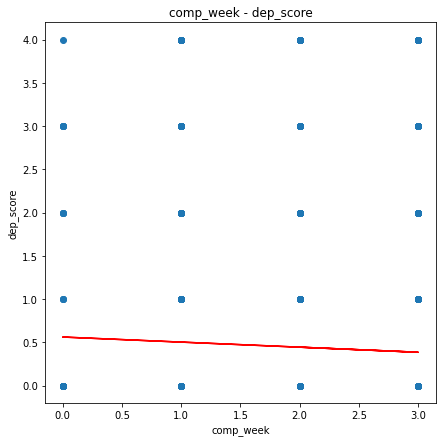

In [5]:
features_comp_week = data[['comp_week']].copy()

features_comp_week.loc[features_comp_week['comp_week'] == 'Not at all', 'comp_week'] = 0
features_comp_week.loc[features_comp_week['comp_week'] == 'Less than 1 hour', 'comp_week'] = 1
features_comp_week.loc[features_comp_week['comp_week'] == '1-2 hours', 'comp_week'] = 2
features_comp_week.loc[features_comp_week['comp_week'] == '3 or more hours', 'comp_week'] = 3

features_comp_week['dep_score'] = targets_dep_score
features_comp_week = features_comp_week.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_comp_week[['comp_week']], features_comp_week[['dep_score']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('A - comp_week', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('comp_week - dep_score')
ax.set_xlabel('comp_week')
ax.set_ylabel('dep_score')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: comp_wend - dep_score

RMSE value:  0.9637553915478693
R2 value:  -0.0015259889486427536


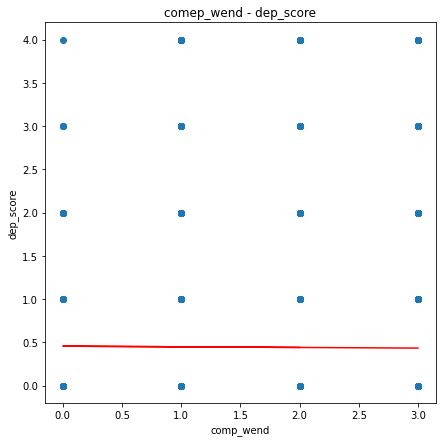

In [6]:
features_comp_wend = data[['comp_wend']].copy()

features_comp_wend.loc[features_comp_wend['comp_wend'] == 'Not at all', 'comp_wend'] = 0
features_comp_wend.loc[features_comp_wend['comp_wend'] == 'Less than 1 hour', 'comp_wend'] = 1
features_comp_wend.loc[features_comp_wend['comp_wend'] == '1-2 hours', 'comp_wend'] = 2
features_comp_wend.loc[features_comp_wend['comp_wend'] == '3 or more hours', 'comp_wend'] = 3

features_comp_wend['dep_score'] = targets_dep_score
features_comp_wend = features_comp_wend.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_comp_wend[['comp_wend']], features_comp_wend[['dep_score']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('A - comp_wend', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('comep_wend - dep_score')
ax.set_xlabel('comp_wend')
ax.set_ylabel('dep_score')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: text_week - dep_score

RMSE value:  0.8585575266528782
R2 value:  -0.002119851201400458


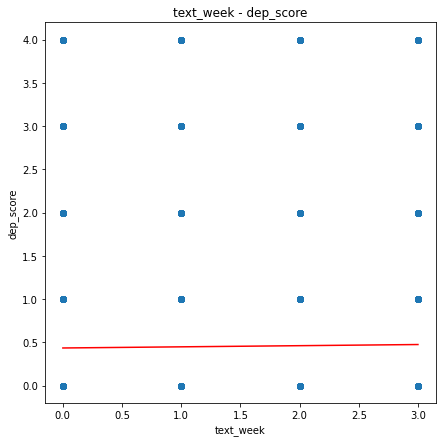

In [7]:
features_text_week = data[['text_week']].copy()

features_text_week.loc[features_text_week['text_week'] == 'Not at all', 'text_week'] = 0
features_text_week.loc[features_text_week['text_week'] == 'Less than 1 hour', 'text_week'] = 1
features_text_week.loc[features_text_week['text_week'] == '1-2 hours', 'text_week'] = 2
features_text_week.loc[features_text_week['text_week'] == '3 or more hours', 'text_week'] = 3

features_text_week['dep_score'] = targets_dep_score
features_text_week = features_text_week.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_text_week[['text_week']], features_text_week[['dep_score']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('A - text_week', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('text_week - dep_score')
ax.set_xlabel('text_week')
ax.set_ylabel('dep_score')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: text_wend - dep_score

RMSE value:  1.0008928108715485
R2 value:  -0.006511103153964637


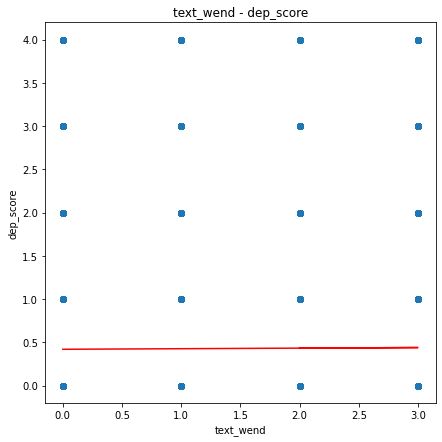

In [8]:
features_text_wend = data[['text_wend']].copy()

features_text_wend.loc[features_text_wend['text_wend'] == 'Not at all', 'text_wend'] = 0
features_text_wend.loc[features_text_wend['text_wend'] == 'Less than 1 hour', 'text_wend'] = 1
features_text_wend.loc[features_text_wend['text_wend'] == '1-2 hours', 'text_wend'] = 2
features_text_wend.loc[features_text_wend['text_wend'] == '3 or more hours', 'text_wend'] = 3

features_text_wend['dep_score'] = targets_dep_score
features_text_wend = features_text_wend.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_text_wend[['text_wend']], features_text_wend[['dep_score']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('A - text_wend', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('text_wend - dep_score')
ax.set_xlabel('text_wend')
ax.set_ylabel('dep_score')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: tv_week - dep_score

RMSE value:  0.9623934045536822
R2 value:  -0.0007080338062335212


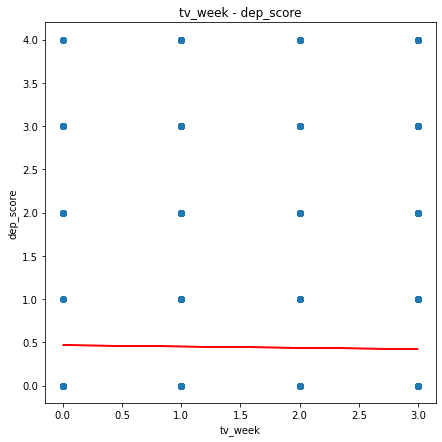

In [9]:
features_tv_week = data[['tv_week']].copy()

features_tv_week.loc[features_tv_week['tv_week'] == 'Not at all', 'tv_week'] = 0
features_tv_week.loc[features_tv_week['tv_week'] == 'Less than 1 hour', 'tv_week'] = 1
features_tv_week.loc[features_tv_week['tv_week'] == '1-2 hours', 'tv_week'] = 2
features_tv_week.loc[features_tv_week['tv_week'] == '3 or more hours', 'tv_week'] = 3

features_tv_week['dep_score'] = targets_dep_score
features_tv_week = features_tv_week.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_tv_week[['tv_week']], features_tv_week[['dep_score']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('A - tv_week', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('tv_week - dep_score')
ax.set_xlabel('tv_week')
ax.set_ylabel('dep_score')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: tv_wend - dep_score

RMSE value:  0.9825821284689044
R2 value:  -0.005969176034351653


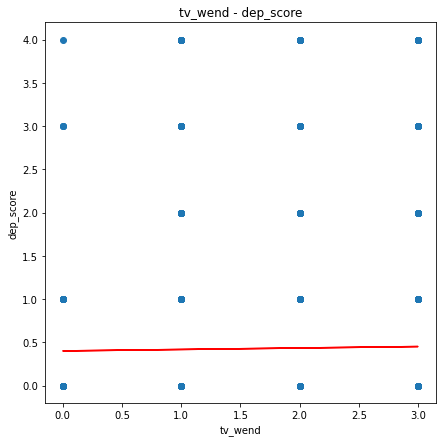

In [10]:
features_tv_wend = data[['tv_wend']].copy()

features_tv_wend.loc[features_tv_wend['tv_wend'] == 'Not at all', 'tv_wend'] = 0
features_tv_wend.loc[features_tv_wend['tv_wend'] == 'Less than 1 hour', 'tv_wend'] = 1
features_tv_wend.loc[features_tv_wend['tv_wend'] == '1-2 hours', 'tv_wend'] = 2
features_tv_wend.loc[features_tv_wend['tv_wend'] == '3 or more hours', 'tv_wend'] = 3

features_tv_wend['dep_score'] = targets_dep_score
features_tv_wend = features_tv_wend.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_tv_wend[['tv_wend']], features_tv_wend[['dep_score']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('A - tv_wend', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('tv_wend - dep_score')
ax.set_xlabel('tv_wend')
ax.set_ylabel('dep_score')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

# Category C

### Regression: dep_band_15 - dep_score

RMSE value:  0.8287705008310363
R2 value:  -0.01767519660704564


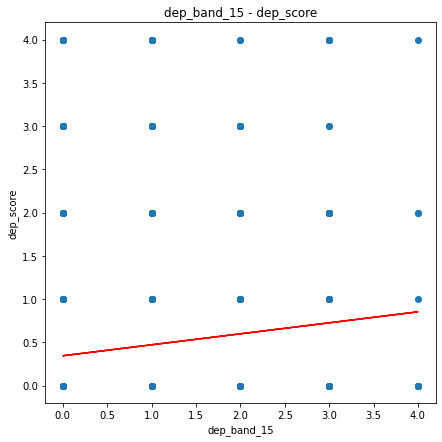

In [11]:
features_dep_band_15 = data[['dep_band_15']].copy()

features_dep_band_15.loc[features_dep_band_15['dep_band_15'] == '<0.1%', 'dep_band_15'] = 0
features_dep_band_15.loc[features_dep_band_15['dep_band_15'] == '~0.5%', 'dep_band_15'] = 1
features_dep_band_15.loc[features_dep_band_15['dep_band_15'] == '~15%', 'dep_band_15'] = 2
features_dep_band_15.loc[features_dep_band_15['dep_band_15'] == '~50%', 'dep_band_15'] = 3
features_dep_band_15.loc[features_dep_band_15['dep_band_15'] == '>70%', 'dep_band_15'] = 4

features_dep_band_15['dep_score'] = targets_dep_score
features_dep_band_15 = features_dep_band_15.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_dep_band_15[['dep_band_15']], features_dep_band_15[['dep_score']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('C - dep_band_15', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('dep_band_15 - dep_score')
ax.set_xlabel('dep_band_15')
ax.set_ylabel('dep_score')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

# Category B

### Regression: comp_house - dep_score

RMSE value:  1.199374139440744
R2 value:  -0.014453814377797691


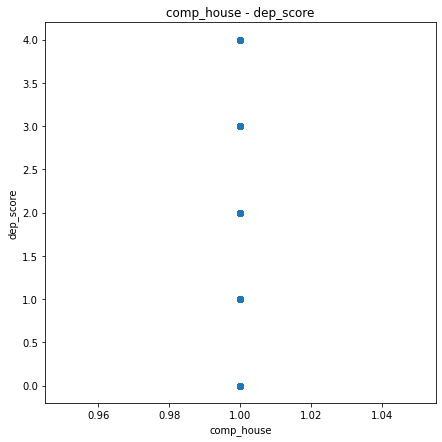

In [12]:
features_comp_house = data[['comp_house']].copy()

features_comp_house.loc[features_comp_house['comp_house'] == 'Yes', 'comp_house'] = 1
features_comp_house.loc[features_comp_house['comp_house'] == 'No', 'comp_house'] = 0

features_comp_house['dep_score'] = targets_dep_score
features_comp_house = features_comp_house.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_comp_house[['comp_house']], features_comp_house[['dep_score']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('B - comp_house', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('comp_house - dep_score')
ax.set_xlabel('comp_house')
ax.set_ylabel('dep_score')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: comp_int_bed_16 - dep_score

RMSE value:  0.9237639140562237
R2 value:  -0.00024188325432428215


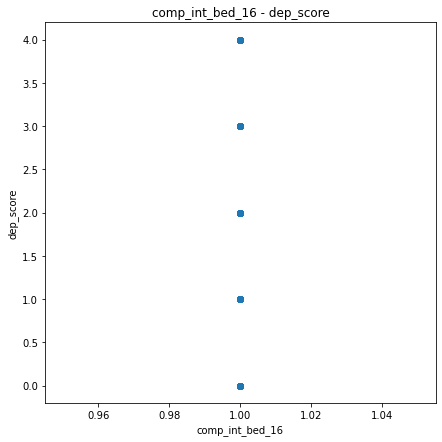

In [13]:
features_comp_int_bed_16 = data[['comp_int_bed_16']].copy()

features_comp_int_bed_16.loc[features_comp_int_bed_16['comp_int_bed_16'] == 'Yes', 'comp_int_bed_16'] = 1
features_comp_int_bed_16.loc[features_comp_int_bed_16['comp_int_bed_16'] == 'No', 'comp_int_bed_16'] = 0

features_comp_int_bed_16['dep_score'] = targets_dep_score
features_comp_int_bed_16 = features_comp_int_bed_16.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_comp_int_bed_16[['comp_int_bed_16']], features_comp_int_bed_16[['dep_score']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('B - comp_int_bed_16', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('comp_int_bed_16 - dep_score')
ax.set_xlabel('comp_int_bed_16')
ax.set_ylabel('dep_score')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: comp_noint_bed_16 - dep_score

RMSE value:  0.8755219525969892
R2 value:  -0.00018096226414976435


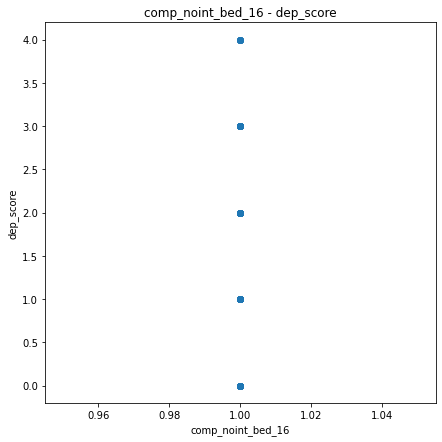

In [14]:
features_comp_noint_bed_16 = data[['comp_noint_bed_16']].copy()

features_comp_noint_bed_16.loc[features_comp_noint_bed_16['comp_noint_bed_16'] == 'Yes', 'comp_noint_bed_16'] = 1
features_comp_noint_bed_16.loc[features_comp_noint_bed_16['comp_noint_bed_16'] == 'No', 'comp_noint_bed_16'] = 0

features_comp_noint_bed_16['dep_score'] = targets_dep_score
features_comp_noint_bed_16 = features_comp_noint_bed_16.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_comp_noint_bed_16[['comp_noint_bed_16']], features_comp_noint_bed_16[['dep_score']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('B - comp_noint_bed_16', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('comp_noint_bed_16 - dep_score')
ax.set_xlabel('comp_noint_bed_16')
ax.set_ylabel('dep_score')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

# Category D

### Regression: alon_week - dep_score

RMSE value:  0.9181504291298487
R2 value:  -0.004305520260552198


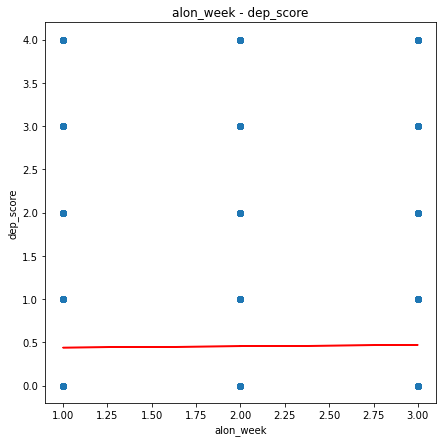

In [15]:
features_alon_week = data[['alon_week']].copy()

features_alon_week.loc[features_alon_week['alon_week'] == 'Not at all', 'alon_week'] = 0
features_alon_week.loc[features_alon_week['alon_week'] == 'Less than 1 hour', 'alon_week'] = 1
features_alon_week.loc[features_alon_week['alon_week'] == '1-2 hours', 'alon_week'] = 2
features_alon_week.loc[features_alon_week['alon_week'] == '3 or more hours', 'alon_week'] = 3

features_alon_week['dep_score'] = targets_dep_score
features_alon_week = features_alon_week.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_alon_week[['alon_week']], features_alon_week[['dep_score']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('D - alon_week', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('alon_week - dep_score')
ax.set_xlabel('alon_week')
ax.set_ylabel('dep_score')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: alon_wend - dep_score

RMSE value:  0.9391553719111189
R2 value:  -0.0038164151795199164


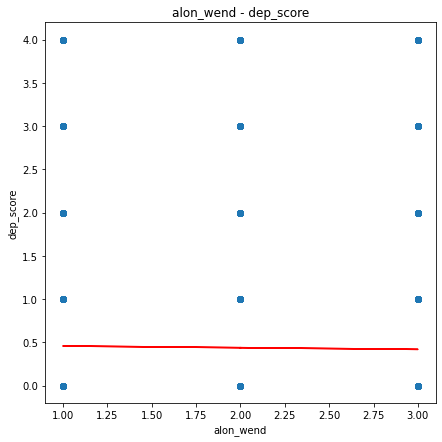

In [16]:
features_alon_wend = data[['alon_wend']].copy()

features_alon_wend.loc[features_alon_wend['alon_wend'] == 'Not at all', 'alon_wend'] = 0
features_alon_wend.loc[features_alon_wend['alon_wend'] == 'Less than 1 hour', 'alon_wend'] = 1
features_alon_wend.loc[features_alon_wend['alon_wend'] == '1-2 hours', 'alon_wend'] = 2
features_alon_wend.loc[features_alon_wend['alon_wend'] == '3 or more hours', 'alon_wend'] = 3

features_alon_wend['dep_score'] = targets_dep_score
features_alon_wend = features_alon_wend.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_alon_wend[['alon_wend']], features_alon_wend[['dep_score']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('D - alon_wend', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('alon_wend - dep_score')
ax.set_xlabel('alon_wend')
ax.set_ylabel('dep_score')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: child_bull - dep_score

RMSE value:  0.9023045771137627
R2 value:  0.0018023423023250107


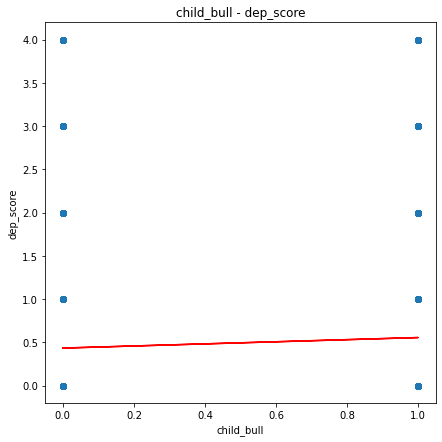

In [17]:
features_child_bull = data[['child_bull']].copy()

features_child_bull.loc[features_child_bull['child_bull'] == 'Yes', 'child_bull'] = 1
features_child_bull.loc[features_child_bull['child_bull'] == 'No', 'child_bull'] = 0

features_child_bull['dep_score'] = targets_dep_score
features_child_bull = features_child_bull.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_child_bull[['child_bull']], features_child_bull[['dep_score']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('D - child_bull', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('child_bull - dep_score')
ax.set_xlabel('child_bull')
ax.set_ylabel('dep_score')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: height_16 - dep_score

RMSE value:  0.8955979821881903
R2 value:  -0.00011923157900328718


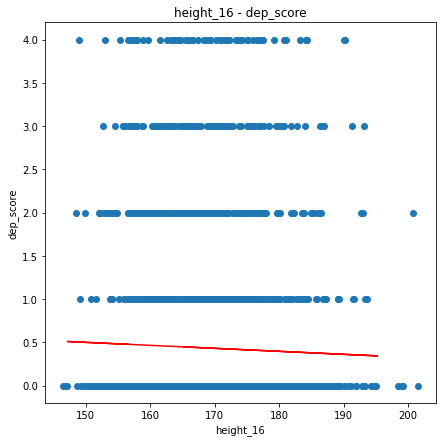

In [18]:
features_height_16 = data[['height_16']].copy()

features_height_16['dep_score'] = targets_dep_score
features_height_16 = features_height_16.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_height_16[['height_16']], features_height_16[['dep_score']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('D - height_16', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('height_16 - dep_score')
ax.set_xlabel('height_16')
ax.set_ylabel('dep_score')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: weight_16 - dep_score

RMSE value:  0.9322418697967314
R2 value:  -0.0017947670397782112


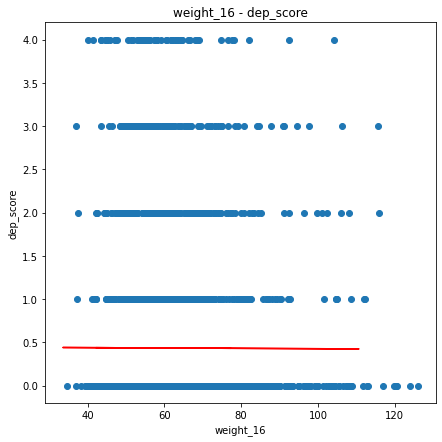

In [19]:
features_weight_16 = data[['weight_16']].copy()

features_weight_16['dep_score'] = targets_dep_score
features_weight_16 = features_weight_16.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_weight_16[['weight_16']], features_weight_16[['dep_score']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('D - weight_16', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('weight_16 - dep_score')
ax.set_xlabel('weight_16')
ax.set_ylabel('dep_score')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: work_week - dep_score

RMSE value:  0.9007624794767713
R2 value:  0.0011654228574775605


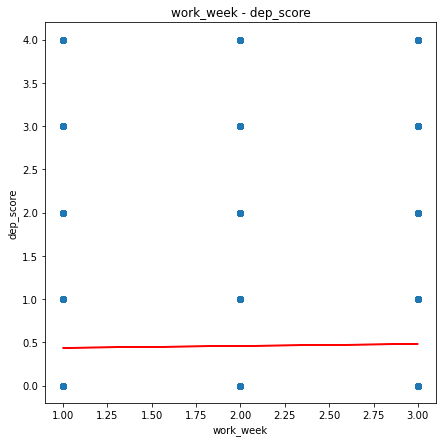

In [20]:
features_work_week = data[['work_week']].copy()

features_work_week.loc[features_work_week['work_week'] == 'Not at all', 'work_week'] = 0
features_work_week.loc[features_work_week['work_week'] == 'Less than 1 hour', 'work_week'] = 1
features_work_week.loc[features_work_week['work_week'] == '1-2 hours', 'work_week'] = 2
features_work_week.loc[features_work_week['work_week'] == '3 or more hours', 'work_week'] = 3

features_work_week['dep_score'] = targets_dep_score
features_work_week = features_work_week.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_work_week[['work_week']], features_work_week[['dep_score']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('D - work_week', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('work_week - dep_score')
ax.set_xlabel('work_week')
ax.set_ylabel('dep_score')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: work_wend - dep_score

RMSE value:  0.985409663783173
R2 value:  -0.005868264425537673


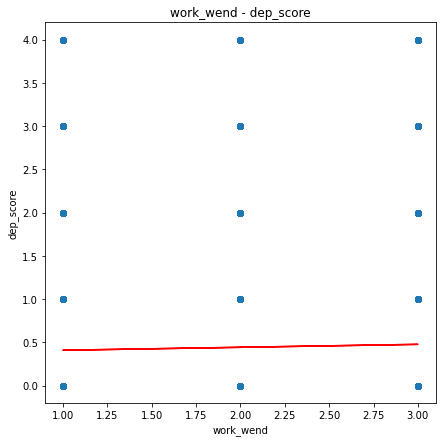

In [21]:
features_work_wend = data[['work_wend']].copy()

features_work_wend.loc[features_work_wend['work_wend'] == 'Not at all', 'work_wend'] = 0
features_work_wend.loc[features_work_wend['work_wend'] == 'Less than 1 hour', 'work_wend'] = 1
features_work_wend.loc[features_work_wend['work_wend'] == '1-2 hours', 'work_wend'] = 2
features_work_wend.loc[features_work_wend['work_wend'] == '3 or more hours', 'work_wend'] = 3

features_work_wend['dep_score'] = targets_dep_score
features_work_wend = features_work_wend.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_work_wend[['work_wend']], features_work_wend[['dep_score']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('D - work_wend', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('work_wend - dep_score')
ax.set_xlabel('work_wend')
ax.set_ylabel('dep_score')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

# Category B & D

### Regression: draw_week - dep_score

RMSE value:  0.9040821075740935
R2 value:  -0.00214558766415629


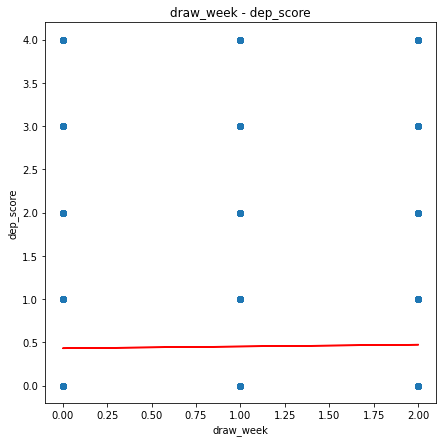

In [22]:
features_draw_week = data[['draw_week']].copy()

features_draw_week.loc[features_draw_week['draw_week'] == 'Not at all', 'draw_week'] = 0
features_draw_week.loc[features_draw_week['draw_week'] == 'Less than 1 hour', 'draw_week'] = 1
features_draw_week.loc[features_draw_week['draw_week'] == '1 or more hours', 'draw_week'] = 2

features_draw_week['dep_score'] = targets_dep_score
features_draw_week = features_draw_week.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_draw_week[['draw_week']], features_draw_week[['dep_score']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('B&D - draw_week', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('draw_week - dep_score')
ax.set_xlabel('draw_week')
ax.set_ylabel('dep_score')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: draw_wend - dep_score

RMSE value:  0.9613283084690936
R2 value:  -0.00051374650386804


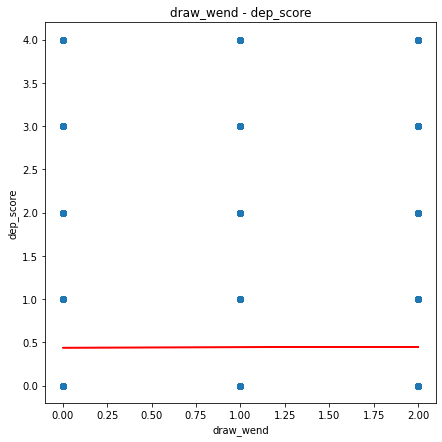

In [23]:
features_draw_wend = data[['draw_wend']].copy()

features_draw_wend.loc[features_draw_wend['draw_wend'] == 'Not at all', 'draw_wend'] = 0
features_draw_wend.loc[features_draw_wend['draw_wend'] == 'Less than 1 hour', 'draw_wend'] = 1
features_draw_wend.loc[features_draw_wend['draw_wend'] == '1 or more hours', 'draw_wend'] = 2

features_draw_wend['dep_score'] = targets_dep_score
features_draw_wend = features_draw_wend.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_draw_wend[['draw_wend']], features_draw_wend[['dep_score']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('B&D - draw_wend', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('draw_wend - dep_score')
ax.set_xlabel('draw_wend')
ax.set_ylabel('dep_score')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: exercise - dep_score

RMSE value:  0.9011707341079468
R2 value:  -0.0006879238670631782


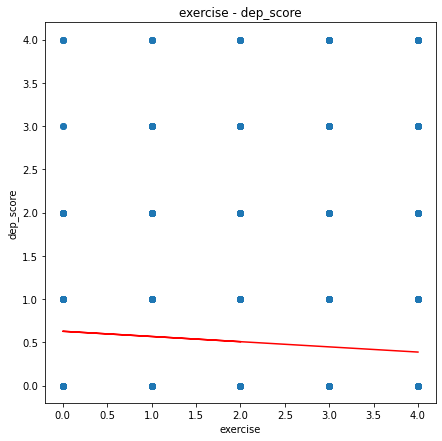

In [24]:
features_exercise = data[['exercise']].copy()

features_exercise.loc[features_exercise['exercise'] == 'Never', 'exercise'] = 0
features_exercise.loc[features_exercise['exercise'] == 'Less than once a month', 'exercise'] = 1
features_exercise.loc[features_exercise['exercise'] == '1-3 times a month', 'exercise'] = 2
features_exercise.loc[features_exercise['exercise'] == '1-4 times a week', 'exercise'] = 3
features_exercise.loc[features_exercise['exercise'] == '5 or more times a week', 'exercise'] = 4

features_exercise['dep_score'] = targets_dep_score
features_exercise = features_exercise.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_exercise[['exercise']], features_exercise[['dep_score']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('B&D - exercise', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('exercise - dep_score')
ax.set_xlabel('exercise')
ax.set_ylabel('dep_score')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: musi_week - dep_score

RMSE value:  0.9192119658108654
R2 value:  0.0005017912285016912


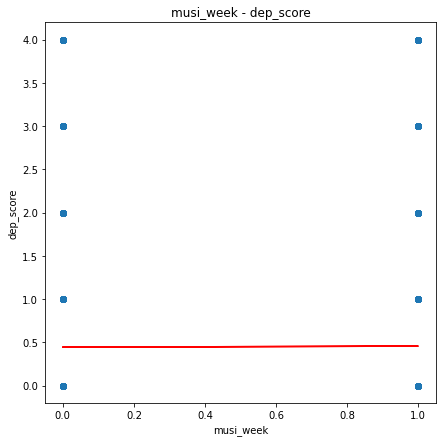

In [25]:
features_musi_week = data[['musi_week']].copy()

features_musi_week.loc[features_musi_week['musi_week'] == 'Not at all', 'musi_week'] = 0
features_musi_week.loc[features_musi_week['musi_week'] == 'Any at all', 'musi_week'] = 1

features_musi_week['dep_score'] = targets_dep_score
features_musi_week = features_musi_week.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_musi_week[['musi_week']], features_musi_week[['dep_score']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('B&D - musi_week', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('musi_week - dep_score')
ax.set_xlabel('musi_week')
ax.set_ylabel('dep_score')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: musi_wend - dep_score

RMSE value:  0.9279298131214648
R2 value:  0.0013265392758829986


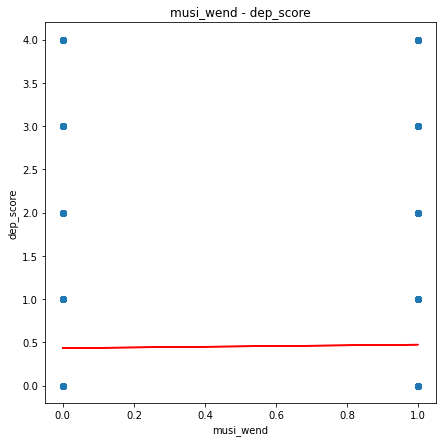

In [26]:
features_musi_wend = data[['musi_wend']].copy()

features_musi_wend.loc[features_musi_wend['musi_wend'] == 'Not at all', 'musi_wend'] = 0
features_musi_wend.loc[features_musi_wend['musi_wend'] == 'Any at all', 'musi_wend'] = 1

features_musi_wend['dep_score'] = targets_dep_score
features_musi_wend = features_musi_wend.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_musi_wend[['musi_wend']], features_musi_wend[['dep_score']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('B&D - musi_wend', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('musi_wend - dep_score')
ax.set_xlabel('musi_wend')
ax.set_ylabel('dep_score')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: out_sum_week - dep_score

RMSE value:  0.8801247400738834
R2 value:  -0.006305286719340053


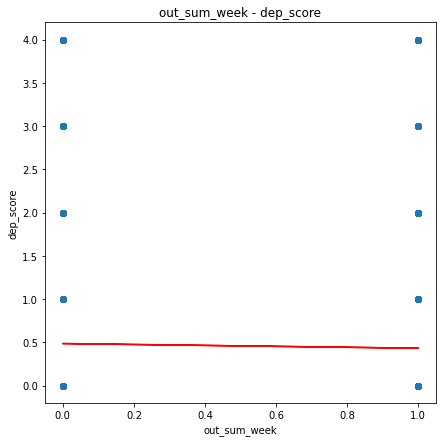

In [27]:
features_out_sum_week = data[['out_sum_week']].copy()

features_out_sum_week.loc[features_out_sum_week['out_sum_week'] == 'Less than 3 hours', 'out_sum_week'] = 0
features_out_sum_week.loc[features_out_sum_week['out_sum_week'] == '3 or more hours', 'out_sum_week'] = 1

features_out_sum_week['dep_score'] = targets_dep_score
features_out_sum_week = features_out_sum_week.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_out_sum_week[['out_sum_week']], features_out_sum_week[['dep_score']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('B&D - out_sum_week', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('out_sum_week - dep_score')
ax.set_xlabel('out_sum_week')
ax.set_ylabel('dep_score')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: out_sum_wend - dep_score

RMSE value:  0.895804470986483
R2 value:  9.803052115120447e-05


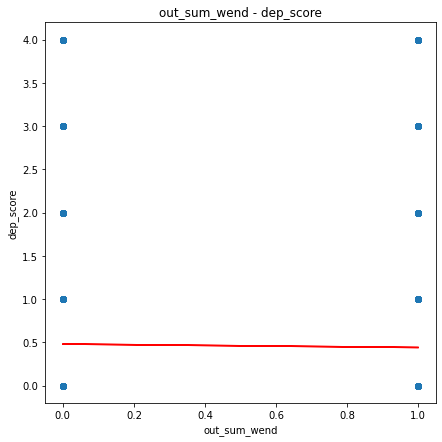

In [28]:
features_out_sum_wend = data[['out_sum_wend']].copy()

features_out_sum_wend.loc[features_out_sum_wend['out_sum_wend'] == 'Less than 3 hours', 'out_sum_wend'] = 0
features_out_sum_wend.loc[features_out_sum_wend['out_sum_wend'] == '3 or more hours', 'out_sum_wend'] = 1

features_out_sum_wend['dep_score'] = targets_dep_score
features_out_sum_wend = features_out_sum_wend.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_out_sum_wend[['out_sum_wend']], features_out_sum_wend[['dep_score']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('B&D - out_sum_wend', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('out_sum_wend - dep_score')
ax.set_xlabel('out_sum_wend')
ax.set_ylabel('dep_score')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: out_win_week - dep_score

RMSE value:  0.8700488822022128
R2 value:  -0.016042527741590096


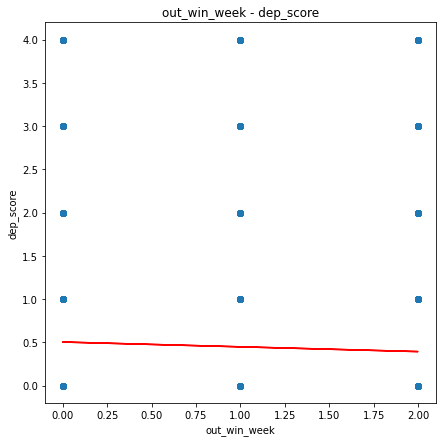

In [29]:
features_out_win_week = data[['out_win_week']].copy()

features_out_win_week.loc[features_out_win_week['out_win_week'] == 'Less than 1 hour', 'out_win_week'] = 0
features_out_win_week.loc[features_out_win_week['out_win_week'] == '1-2 hours', 'out_win_week'] = 1
features_out_win_week.loc[features_out_win_week['out_win_week'] == '3 or more hours', 'out_win_week'] = 2

features_out_win_week['dep_score'] = targets_dep_score
features_out_win_week = features_out_win_week.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_out_win_week[['out_win_week']], features_out_win_week[['dep_score']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('B&D - out_win_week', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('out_win_week - dep_score')
ax.set_xlabel('out_win_week')
ax.set_ylabel('dep_score')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: out_win_wend - dep_score

RMSE value:  0.9885082722457019
R2 value:  -0.0066294209271555715


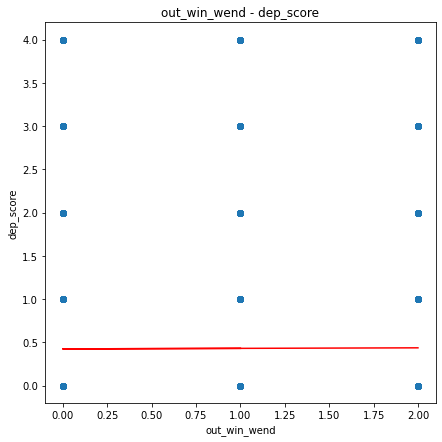

In [30]:
features_out_win_wend = data[['out_win_wend']].copy()

features_out_win_wend.loc[features_out_win_wend['out_win_wend'] == 'Less than 1 hour', 'out_win_wend'] = 0
features_out_win_wend.loc[features_out_win_wend['out_win_wend'] == '1-2 hours', 'out_win_wend'] = 1
features_out_win_wend.loc[features_out_win_wend['out_win_wend'] == '3 or more hours', 'out_win_wend'] = 2

features_out_win_wend['dep_score'] = targets_dep_score
features_out_win_wend = features_out_win_wend.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_out_win_wend[['out_win_wend']], features_out_win_wend[['dep_score']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('B&D - out_win_wend', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('out_win_wend - dep_score')
ax.set_xlabel('out_win_wend')
ax.set_ylabel('dep_score')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: play_week - dep_score

RMSE value:  0.9221670539096828
R2 value:  0.0015274090836461252


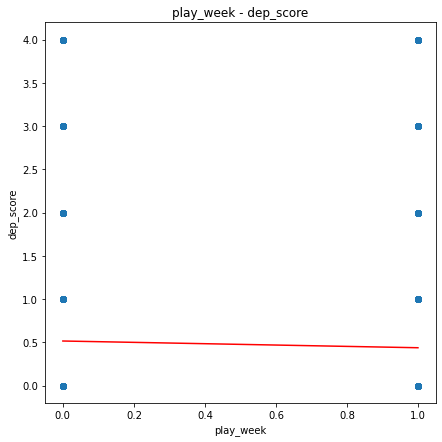

In [31]:
features_play_week = data[['play_week']].copy()

features_play_week.loc[features_play_week['play_week'] == 'Less than 3 hours', 'play_week'] = 0
features_play_week.loc[features_play_week['play_week'] == '3 or more hours', 'play_week'] = 1

features_play_week['dep_score'] = targets_dep_score
features_play_week = features_play_week.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_play_week[['play_week']], features_play_week[['dep_score']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('B&D - play_week', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('play_week - dep_score')
ax.set_xlabel('play_week')
ax.set_ylabel('dep_score')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: play_wend - dep_score

RMSE value:  0.9692525399859466
R2 value:  -0.003170941934932614


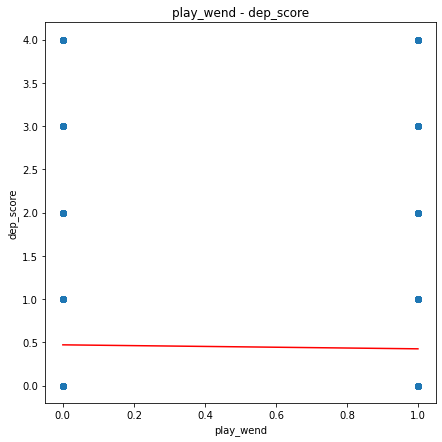

In [32]:
features_play_wend = data[['play_wend']].copy()

features_play_wend.loc[features_play_wend['play_wend'] == 'Less than 3 hours', 'play_wend'] = 0
features_play_wend.loc[features_play_wend['play_wend'] == '3 or more hours', 'play_wend'] = 1

features_play_wend['dep_score'] = targets_dep_score
features_play_wend = features_play_wend.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_play_wend[['play_wend']], features_play_wend[['dep_score']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('B&D - play_wend', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('play_wend - dep_score')
ax.set_xlabel('play_wend')
ax.set_ylabel('dep_score')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: read_week - dep_score

RMSE value:  0.9950076896022888
R2 value:  -0.001381215860486229


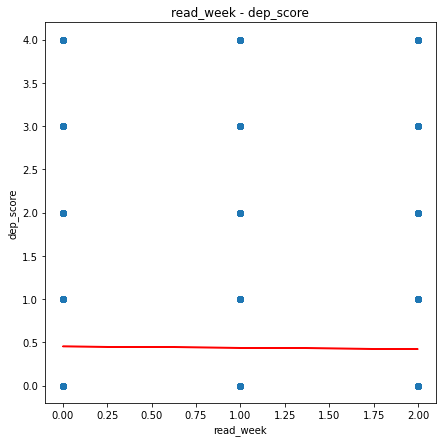

In [33]:
features_read_week = data[['read_week']].copy()

features_read_week.loc[features_read_week['read_week'] == 'Not at all', 'read_week'] = 0
features_read_week.loc[features_read_week['read_week'] == 'Less than 1 hour', 'read_week'] = 1
features_read_week.loc[features_read_week['read_week'] == '1 or more hours', 'read_week'] = 2

features_read_week['dep_score'] = targets_dep_score
features_read_week = features_read_week.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_read_week[['read_week']], features_read_week[['dep_score']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('B&D - read_week', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('read_week - dep_score')
ax.set_xlabel('read_week')
ax.set_ylabel('dep_score')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: read_wend - dep_score

RMSE value:  0.840038640313796
R2 value:  -0.006175685069462533


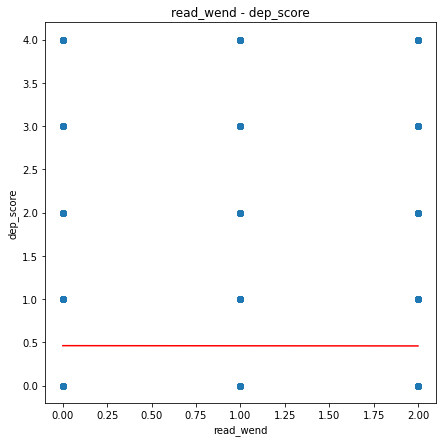

In [34]:
features_read_wend = data[['read_wend']].copy()

features_read_wend.loc[features_read_wend['read_wend'] == 'Not at all', 'read_wend'] = 0
features_read_wend.loc[features_read_wend['read_wend'] == 'Less than 1 hour', 'read_wend'] = 1
features_read_wend.loc[features_read_wend['read_wend'] == '1 or more hours', 'read_wend'] = 2

features_read_wend['dep_score'] = targets_dep_score
features_read_wend = features_read_wend.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_read_wend[['read_wend']], features_read_wend[['dep_score']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('B&D - read_wend', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('read_wend - dep_score')
ax.set_xlabel('read_wend')
ax.set_ylabel('dep_score')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: talk_mob_week - dep_score

RMSE value:  0.9740853918473205
R2 value:  -0.0013292368528459164


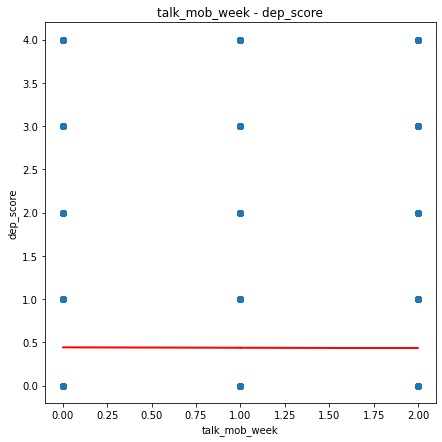

In [35]:
features_talk_mob_week = data[['talk_mob_week']].copy()

features_talk_mob_week.loc[features_talk_mob_week['talk_mob_week'] == 'Not at all', 'talk_mob_week'] = 0
features_talk_mob_week.loc[features_talk_mob_week['talk_mob_week'] == 'Less than 1 hour', 'talk_mob_week'] = 1
features_talk_mob_week.loc[features_talk_mob_week['talk_mob_week'] == '1 or more hours', 'talk_mob_week'] = 2

features_talk_mob_week['dep_score'] = targets_dep_score
features_talk_mob_week = features_talk_mob_week.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_talk_mob_week[['talk_mob_week']], features_talk_mob_week[['dep_score']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('B&D - talk_mob_week', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('talk_mob_week - dep_score')
ax.set_xlabel('talk_mob_week')
ax.set_ylabel('dep_score')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: talk_mob_wend - dep_score

RMSE value:  0.990816891793204
R2 value:  -0.00817003602256361


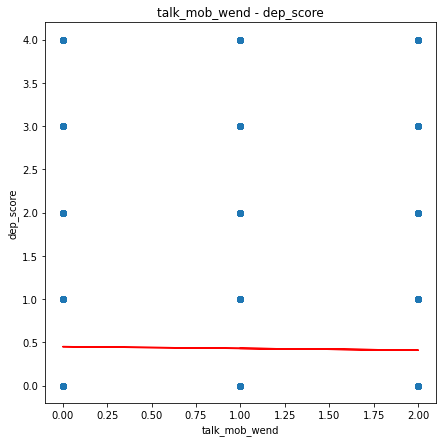

In [36]:
features_talk_mob_wend = data[['talk_mob_wend']].copy()

features_talk_mob_wend.loc[features_talk_mob_wend['talk_mob_wend'] == 'Not at all', 'talk_mob_wend'] = 0
features_talk_mob_wend.loc[features_talk_mob_wend['talk_mob_wend'] == 'Less than 1 hour', 'talk_mob_wend'] = 1
features_talk_mob_wend.loc[features_talk_mob_wend['talk_mob_wend'] == '1 or more hours', 'talk_mob_wend'] = 2

features_talk_mob_wend['dep_score'] = targets_dep_score
features_talk_mob_wend = features_talk_mob_wend.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_talk_mob_wend[['talk_mob_wend']], features_talk_mob_wend[['dep_score']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('B&D - talk_mob_wend', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('talk_mob_wend - dep_score')
ax.set_xlabel('talk_mob_wend')
ax.set_ylabel('dep_score')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: talk_phon_week - dep_score

RMSE value:  0.8990166428264892
R2 value:  -0.0014066511144195104


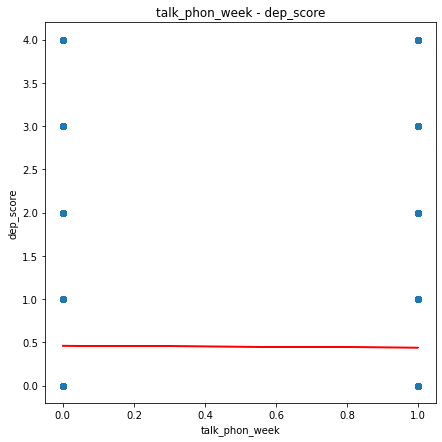

In [37]:
features_talk_phon_week = data[['talk_phon_week']].copy()

features_talk_phon_week.loc[features_talk_phon_week['talk_phon_week'] == 'Not at all', 'talk_phon_week'] = 0
features_talk_phon_week.loc[features_talk_phon_week['talk_phon_week'] == 'Any at all', 'talk_phon_week'] = 1

features_talk_phon_week['dep_score'] = targets_dep_score
features_talk_phon_week = features_talk_phon_week.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_talk_phon_week[['talk_phon_week']], features_talk_phon_week[['dep_score']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('B&D - talk_phon_week', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('talk_phon_week - dep_score')
ax.set_xlabel('talk_phon_week')
ax.set_ylabel('dep_score')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: talk_phon_wend - dep_score

RMSE value:  0.9638805193061636
R2 value:  -0.0009039790201388342


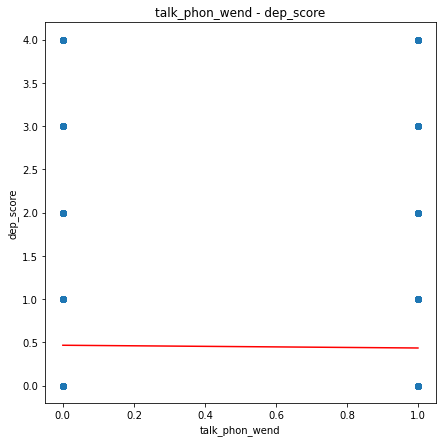

In [41]:
features_talk_phon_wend = data[['talk_phon_wend']].copy()

features_talk_phon_wend.loc[features_talk_phon_wend['talk_phon_wend'] == 'Not at all', 'talk_phon_wend'] = 0
features_talk_phon_wend.loc[features_talk_phon_wend['talk_phon_wend'] == 'Any at all', 'talk_phon_wend'] = 1

features_talk_phon_wend['dep_score'] = targets_dep_score
features_talk_phon_wend = features_talk_phon_wend.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_talk_phon_wend[['talk_phon_wend']], features_talk_phon_wend[['dep_score']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('B&D - talk_phon_wend', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('talk_phon_wend - dep_score')
ax.set_xlabel('talk_phon_wend')
ax.set_ylabel('dep_score')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

In [39]:
r2_list.sort(key=lambda x:-x[1])
print("R2 sorted list\n")
for x, y in r2_list:
    print(x, y)

R2 sorted list

D - child_bull 0.0018023423023250107
B&D - play_week 0.0015274090836461252
B&D - musi_wend 0.0013265392758829986
D - work_week 0.0011654228574775605
B&D - musi_week 0.0005017912285016912
B&D - out_sum_wend 9.803052115120447e-05
D - height_16 -0.00011923157900328718
B - comp_noint_bed_16 -0.00018096226414976435
B - comp_int_bed_16 -0.00024188325432428215
B&D - draw_wend -0.00051374650386804
B&D - exercise -0.0006879238670631782
A - tv_week -0.0007080338062335212
B&D - talk_phon_wend -0.0009039790201388342
B&D - talk_mob_week -0.0013292368528459164
B&D - read_week -0.001381215860486229
B&D - talk_phon_week -0.0014066511144195104
A - comp_wend -0.0015259889486427536
D - weight_16 -0.0017947670397782112
A - text_week -0.002119851201400458
B&D - draw_week -0.00214558766415629
B&D - play_wend -0.003170941934932614
D - alon_wend -0.0038164151795199164
A - comp_week -0.004149344358364004
D - alon_week -0.004305520260552198
D - work_wend -0.005868264425537673
A - tv_wend -0.0059